In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Overall view of the data 

In [2]:
data_file = '../data/raw/filtered.tsv'

data = pd.read_csv(data_file, sep='\t')

data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [3]:
data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


The ref_tox and trn_tox values suggest that the reference texts are, on average, more toxic than the transformed texts (0.541372 vs. 0.434490). This could suggest that whatever transformation is applied to the texts tends to reduce their toxicity on average.

In [4]:
# Compute the correlation matrix between numeric columns
correlation_matrix = data[['similarity', 'lenght_diff', 'ref_tox', 'trn_tox']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             similarity  lenght_diff   ref_tox   trn_tox
similarity     1.000000    -0.106921 -0.012626  0.015804
lenght_diff   -0.106921     1.000000  0.088967 -0.088656
ref_tox       -0.012626     0.088967  1.000000 -0.959669
trn_tox        0.015804    -0.088656 -0.959669  1.000000


The strong negative correlation between reference and translation text toxicity suggests that, in most cases, when one text becomes more toxic, the other text becomes less toxic.
The weak correlation between length difference and any other parameters, as well as the weak correlation between similarity and any other parameters, indicates that this parameter is unimportant for designing the effective model.

### Data Cleaning
Since 'similarity' and 'lenght_diff' are unimportant and 'Unnamed: 0' does not do anyone any good, we can drop them.

In [5]:
#Cleaning unnessacary data
data.drop(['Unnamed: 0', 'similarity', 'lenght_diff'], axis=1, inplace=True)
data.head()

,reference,translation,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.009402,0.999348


### Dealing with toxicity distribution 

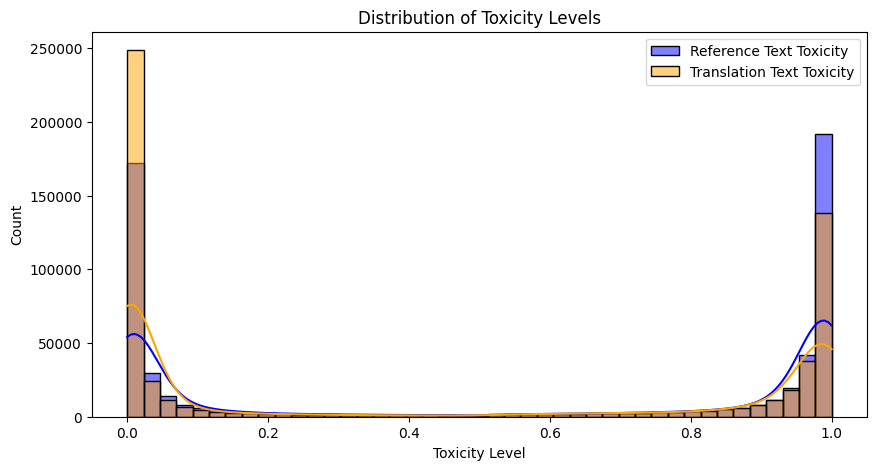

In [6]:
# Create a bar chart to visualize the distribution of toxicity levels
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='ref_tox', kde=True, label='Reference Text Toxicity', color='blue')
sns.histplot(data=data, x='trn_tox', kde=True, label='Translation Text Toxicity', color='orange')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')
plt.title('Distribution of Toxicity Levels')
plt.legend()
plt.show()

The observation that the distribution of toxicity levels is skewed to both extremes (0 and 1) indicates that the dataset contains a significant imbalance in toxicity levels. Most of the data points have toxicity values close to either 0 (non-toxic) or 1 (toxic), with few instances in between. Additionally, the distribution suggests that there may be a slight bias towards higher toxicity in translation texts and a slight bias towards lower toxicity in reference texts.

Imbalanced data can indeed be leveraged to create a dataset with samples that have a high toxicity level and their paraphrased versions with low toxicity levels. 

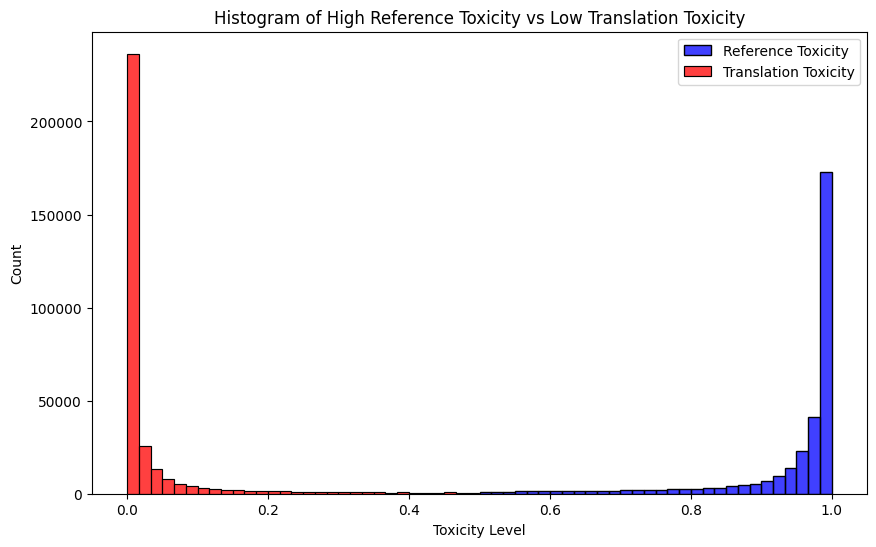

In [7]:
# Filter the rows where reference toxicity > 0.5 and translation toxicity < 0.5
high_ref_tox_low_trn_tox = data[(data['ref_tox'] > 0.5) & (data['trn_tox'] < 0.5)]

plt.figure(figsize=(10, 6))
sns.histplot(high_ref_tox_low_trn_tox['ref_tox'], bins=30, kde=False, color='blue')
sns.histplot(high_ref_tox_low_trn_tox['trn_tox'], bins=30, kde=False, color='red')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')
plt.title('Histogram of High Reference Toxicity vs Low Translation Toxicity')
plt.legend(['Reference Toxicity', 'Translation Toxicity'])
plt.show()

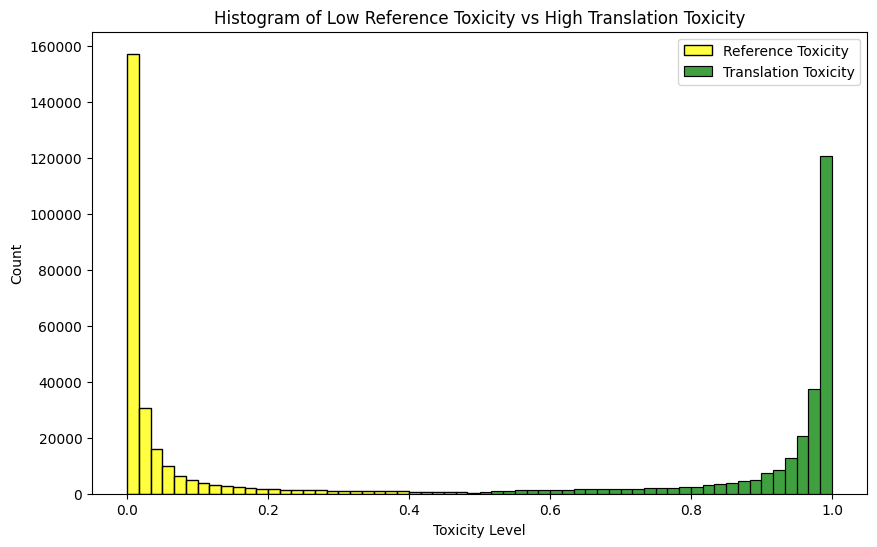

In [8]:
# Filter the rows where reference toxicity < 0.5 and translation toxicity > 0.5
low_ref_tox_high_trn_tox = data[(data['ref_tox'] < 0.5) & (data['trn_tox'] > 0.5)]

plt.figure(figsize=(10, 6))
sns.histplot(low_ref_tox_high_trn_tox['ref_tox'], bins=30, kde=False, color='yellow')
sns.histplot(low_ref_tox_high_trn_tox['trn_tox'], bins=30, kde=False, color='green')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')
plt.title('Histogram of Low Reference Toxicity vs High Translation Toxicity')
plt.legend(['Reference Toxicity', 'Translation Toxicity'])
plt.show()

The situation where previously non-toxic sentences are transformed into toxic ones isn't good. Let's swap these columns.

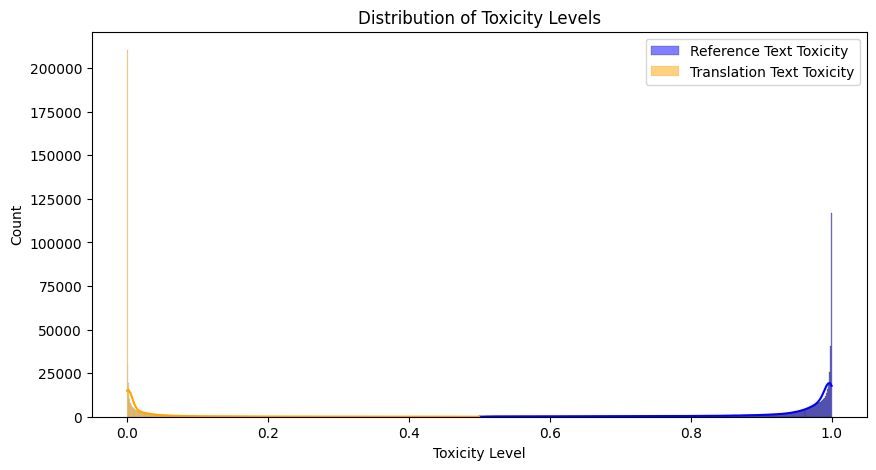

In [9]:
# Swap 'reference' and 'translation' where 'ref_tox' < 'trn_tox
mask = data['ref_tox'] < data['trn_tox']
data.loc[mask, ['reference', 'translation']] = data.loc[mask, ['translation', 'reference']].values
data.loc[mask, ['ref_tox', 'trn_tox']] = data.loc[mask, ['trn_tox', 'ref_tox']].values

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='ref_tox', kde=True, label='Reference Text Toxicity', color='blue')
sns.histplot(data=data, x='trn_tox', kde=True, label='Translation Text Toxicity', color='orange')
plt.xlabel('Toxicity Level')
plt.ylabel('Count')
plt.title('Distribution of Toxicity Levels')
plt.legend()
plt.show()

In [10]:
print(f"Count of rows: {data.shape[0]}")

# Delete rows where ref_tox < 0.95 or trn_tox > 0.05
data = data[~((data['ref_tox'] < 0.95) | (data['trn_tox'] > 0.05))]

print(f"Count of remaining rows: {data.shape[0]}")

Count of rows: 577777
Count of remaining rows: 349705


I chose thresholds like 0.95 for high toxicity and 0.05 for low toxicity because these thresholds are not uncommon, especially in a binary classification scenario where we want to ensure a clear distinction between the "high" and "low" classes. 

### Lowercasing and Removing Punctuation

I lowercase all words so the model wouldn't  'think' that 'Hello' and 'hello' are different words.

In [11]:
# convert to lowercase for the 'reference' column
data['reference'] = data['reference'].str.lower()

# convert to lowercase for the 'translation' column
data['translation'] = data['translation'].str.lower()

There is a lot of rubbish in the text such as Japanese hieroglyphs (no offence to the Japanese language, we are just building a language-based model) so we delete everything except the lowercase English alphabet. Commas and full stops are gonna be deleted as well since they serve little help, and keeping space for other words in memory is a bigger priority for me.

In [12]:
# Replace unwanted characters in 'reference' column
data['reference'] = data['reference'].str.replace('[^a-z\s]', '', regex=True)

# Replace unwanted characters in 'translation' column
data['translation'] = data['translation'].str.replace('[^a-z\s]', '', regex=True)

data.head()

,reference,translation,ref_tox,trn_tox
0,if alkar floods her with her mental waste it w...,if alkar is flooding her with psychic waste th...,0.981983,0.014195
4,i have orders to kill her,ive got orders to put her down,0.999348,0.009402
5,im not gonna have a child with the same geneti...,im not going to breed kids with a genetic diso...,0.950956,0.035846
6,theyre all laughing at us so well kick your ass,theyre laughing at us well show you,0.999492,0.000131
10,youd probably want me to buy you some chocolat...,i suppose you want me to buy you flowers and c...,0.980341,0.000078


My goal is to ensure that the inputs to our model are no longer than 128 characters to align with a network architecture that has a maximum of 128 neurons in the input layer. So I will delete all rows where either the 'reference' text or the 'translation' text exceeds 128 characters.

In [13]:
# Filter out rows where 'reference' or 'translation' length is greater than 128 characters
data = data[(data['reference'].str.len() <= 128) & (data['translation'].str.len() <= 128)]

# Now filtered_data contains only the rows where both 'reference' and 'translation' are 128 characters or less
print(f"Number of rows after filtering: {data.shape[0]}")

Number of rows after filtering: 336256


Great! Only 13449 rows were deleted, which I belive is very little. But the speed of training will be significantly increased.

### Data Saving

In [14]:
output_file_path = '../data/intermediate/filtered_data.tsv'

data.to_csv(output_file_path, sep='\t', index=False)

print(f"Filtered data saved to {output_file_path}")

Filtered data saved to ../data/intermediate/filtered_data.tsv
